<a href="https://colab.research.google.com/github/UmeshGayashan/EC7212-Take-Home-Assignment-2/blob/main/Task1_TakeHomeAssingment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

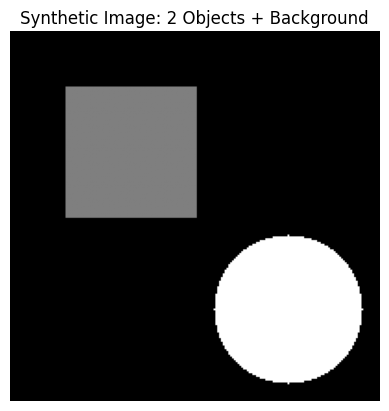

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create a black background
# 200x200 pixel image with all pixels set to 0 (black)
# dtype=np.uint8 means pixel values range 0 to 255
img = np.zeros((200, 200), dtype=np.uint8)

# Add a gray square (intensity 127)
# -1 means the rectangle is filled (not just the border)
cv2.rectangle(img, (30, 30), (100, 100), 127, -1)

# Add a white circle (intensity 255)
# (150, 150) - center, 40 - radius
cv2.circle(img, (150, 150), 40, 255, -1)

# Show the Image
plt.imshow(img, cmap='gray')
plt.title("Synthetic Image: 2 Objects + Background")
plt.axis('off')
plt.show()

In [6]:
# Add Gaussian noise
mean = 0
std = 20
gaussian_noise = np.random.normal(mean, std, img.shape).astype(np.float32)
noisy_img = cv2.add(img.astype(np.float32), gaussian_noise)
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

In [11]:
# Apply Otsu's Thresholding
# Dummy threshold value => 0
# THRESH_BINARY	-> Binary thresholding: values > threshold => 255, others => 0
T, otsu_thresh = cv2.threshold(noisy_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

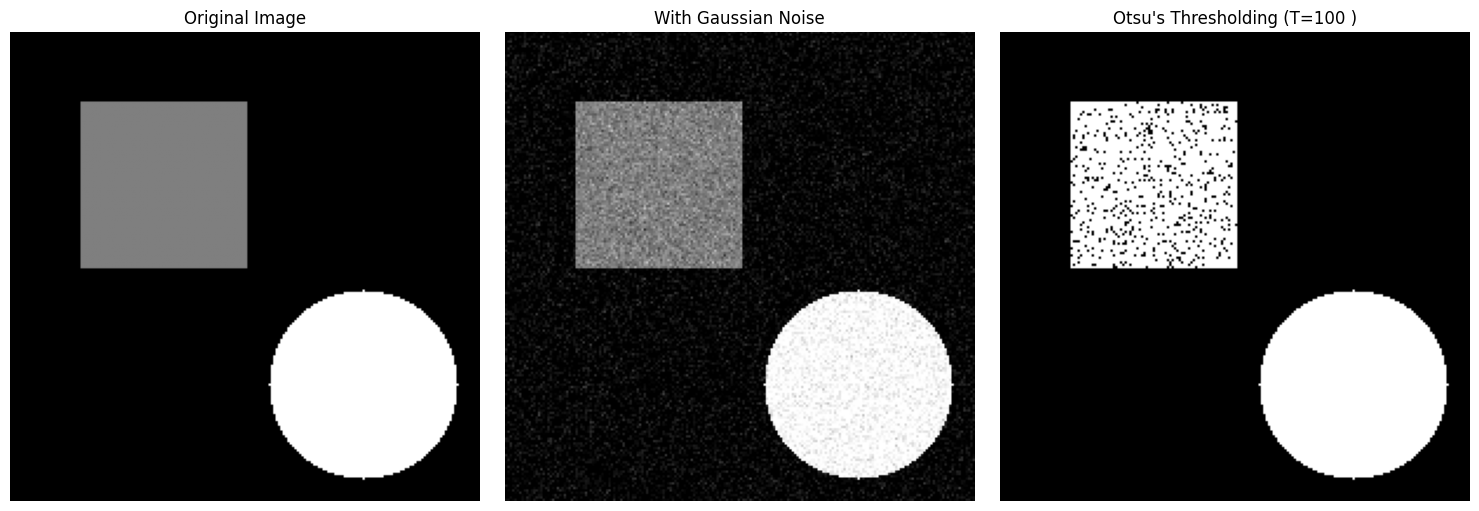

In [12]:
# Show the results for task1
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original Image")

axes[1].imshow(noisy_img, cmap='gray')
axes[1].set_title("With Gaussian Noise")

axes[2].imshow(otsu_thresh, cmap='gray')
axes[2].set_title(f"Otsu's Thresholding (T={int(T)} )")

for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()